# Bike Sharing Dataset

> This is an analysis of bike sharing data from Capital Bikeshare in Washington, D.C., USA, from January 1, 2011 to December 31, 2012. The data is aggregated on an hourly basis. This means that no initial and final locations of the individual rides are available, but only the total number of rides per hour. Additional meteorological information is available in the data.

> To view the presentation given to the client regarding this case study, [Click Here](https://github.com/Fawzy-Almatary/Portfolio-Projects/blob/main/Bikesharing-Analysis_(First-Python-Project)/Bikesharing_Analysis_Presentation.pdf).

In [1]:
# import the packages that will be needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import the csv file
url = 'https://raw.githubusercontent.com/Fawzy-Almatary/Portfolio-Projects/main/Bikesharing-Analysis_(First-Python-Project)/hour.csv'

hourly_data = pd.read_csv(url)

# have a look at the data
print(f"Shape of data: {hourly_data.shape}")
print(f"Missing values in the data: {hourly_data.isnull().sum().sum()}")
hourly_data.info()
hourly_data.sample(10, random_state=5)

Shape of data: (17379, 17)
Missing values in the data: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4707,4708,2011-07-20,3,0,7,1,0,3,1,1,0.70,0.6667,0.84,0.0000,4,7,11
13755,13756,2012-08-01,3,1,8,8,0,3,1,2,0.66,0.6061,0.78,0.1940,32,649,681
10794,10795,2012-03-30,2,1,3,21,0,5,1,1,0.38,0.3939,0.66,0.1343,30,190,220
7665,7666,2011-11-21,4,0,11,0,0,1,1,2,0.46,0.4545,0.94,0.0000,4,13,17
9751,9752,2012-02-16,1,1,2,6,0,4,1,2,0.30,0.3182,0.70,0.0896,4,83,87
16918,16919,2012-12-12,4,1,12,17,0,3,1,2,0.32,0.3030,0.53,0.2239,21,540,561
10817,10818,2012-03-31,2,1,3,20,0,6,0,2,0.40,0.4091,0.71,0.3284,52,156,208
13215,13216,2012-07-09,3,1,7,20,0,1,1,2,0.74,0.6818,0.55,0.1045,69,378,447
10983,10984,2012-04-07,2,1,4,19,0,6,0,1,0.54,0.5152,0.16,0.3284,170,243,413
14247,14248,2012-08-21,3,1,8,20,0,2,1,1,0.64,0.6061,0.73,0.0000,62,296,358


In [3]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Editing the data to make it more readable.
* According to the README file provided with the data, in the 'Dataset characteristics' section, some data (seasons, yr, month, weekday, weathersit) are represented in numerical form that encode for categorical values. So, we use the apply and lambda functions to make some of them more readable.
* Also, temp, atemp, hum and windspeed are divided to 41, 50, 100 and 67 respectively to be normalized, so we rescale hum and windspeed back to their normal by multiplying the normalized values with 100 and 67 respectively, but we keep temp and atemp normalized as rescaling them might affect the analysis.
* But before we do that, we make a copy of our data to ensure any affects we apply does not affect the original dataset.

In [4]:
# create a copy of the data
the_data = hourly_data.copy()

# create the dictionaries which will be used with the apply and lambda functions
seasons_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
yr_dict = {0: 2011, 1: 2012}
weekday_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weathersit_dict = {1: 'clear', 2: 'mist_cloudy', 3: 'light_snow_rain', 4: 'heavy_snow_rain'}

# use the distinaries to transform the columns from numerical to categorical
the_data['season'] = the_data['season'].apply(lambda x: seasons_dict[x])
the_data['yr'] = the_data['yr'].apply(lambda x: yr_dict[x])
the_data['weekday'] = the_data['weekday'].apply(lambda x: weekday_dict[x])
the_data['weathersit'] = the_data['weathersit'].apply(lambda x: weathersit_dict[x])

# rescale the normalized values
the_data['hum'] = the_data['hum'] * 100
the_data['windspeed'] = the_data['windspeed'] * 67

# Take a look at a sample of our data after the changes made
the_data.sample(10, random_state=10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6557,6558,2011-10-05,Fall,2011,10,19,0,Wednesday,1,clear,0.58,0.5455,56.0,8.9981,40,334,374
11737,11738,2012-05-09,Spring,2012,5,6,0,Wednesday,1,mist_cloudy,0.56,0.5303,88.0,7.0015,5,121,126
4952,4953,2011-07-30,Summer,2011,7,6,0,Saturday,0,clear,0.72,0.6818,70.0,19.9995,6,18,24
2853,2854,2011-05-03,Spring,2011,5,19,0,Tuesday,1,clear,0.68,0.6364,57.0,23.9994,42,323,365
3697,3698,2011-06-07,Spring,2011,6,23,0,Tuesday,1,clear,0.68,0.6364,79.0,7.0015,18,72,90
7305,7306,2011-11-06,Fall,2011,11,0,0,Sunday,0,clear,0.28,0.3182,75.0,0.0000,10,65,75
15922,15923,2012-11-01,Fall,2012,11,3,0,Thursday,1,clear,0.34,0.3333,61.0,8.9981,5,10,15
17084,17085,2012-12-19,Fall,2012,12,15,0,Wednesday,1,clear,0.42,0.4242,50.0,19.0012,28,209,237
15165,15166,2012-09-29,Fall,2012,9,2,0,Saturday,0,mist_cloudy,0.54,0.5152,56.0,15.0013,12,80,92
8756,8757,2012-01-05,Winter,2012,1,16,0,Thursday,1,clear,0.36,0.3333,34.0,19.0012,19,178,197


### Analyze the difference between registered and casual users from different perspectives
* Firstly, we will do some analysis regarding the the differences of registered and casual users.
* The total numbers of rides (for both registered and casual users) is also found in a separate column called 'cnt', which we need to validate its accuracy first.
* Different plots for rides by registered and casual users will be plotted to see the trends.

In [5]:
# Validate the accuracy of 'cnt' column
assert (the_data.casual + the_data.registered == the_data.cnt).all(), \
    "Column 'cnt' does not equal the sum of column 'casual' and column 'registered'."
print("Column 'cnt' equals the sum of column 'casual' and column 'registered'.")

Column 'cnt' equals the sum of column 'casual' and column 'registered'.


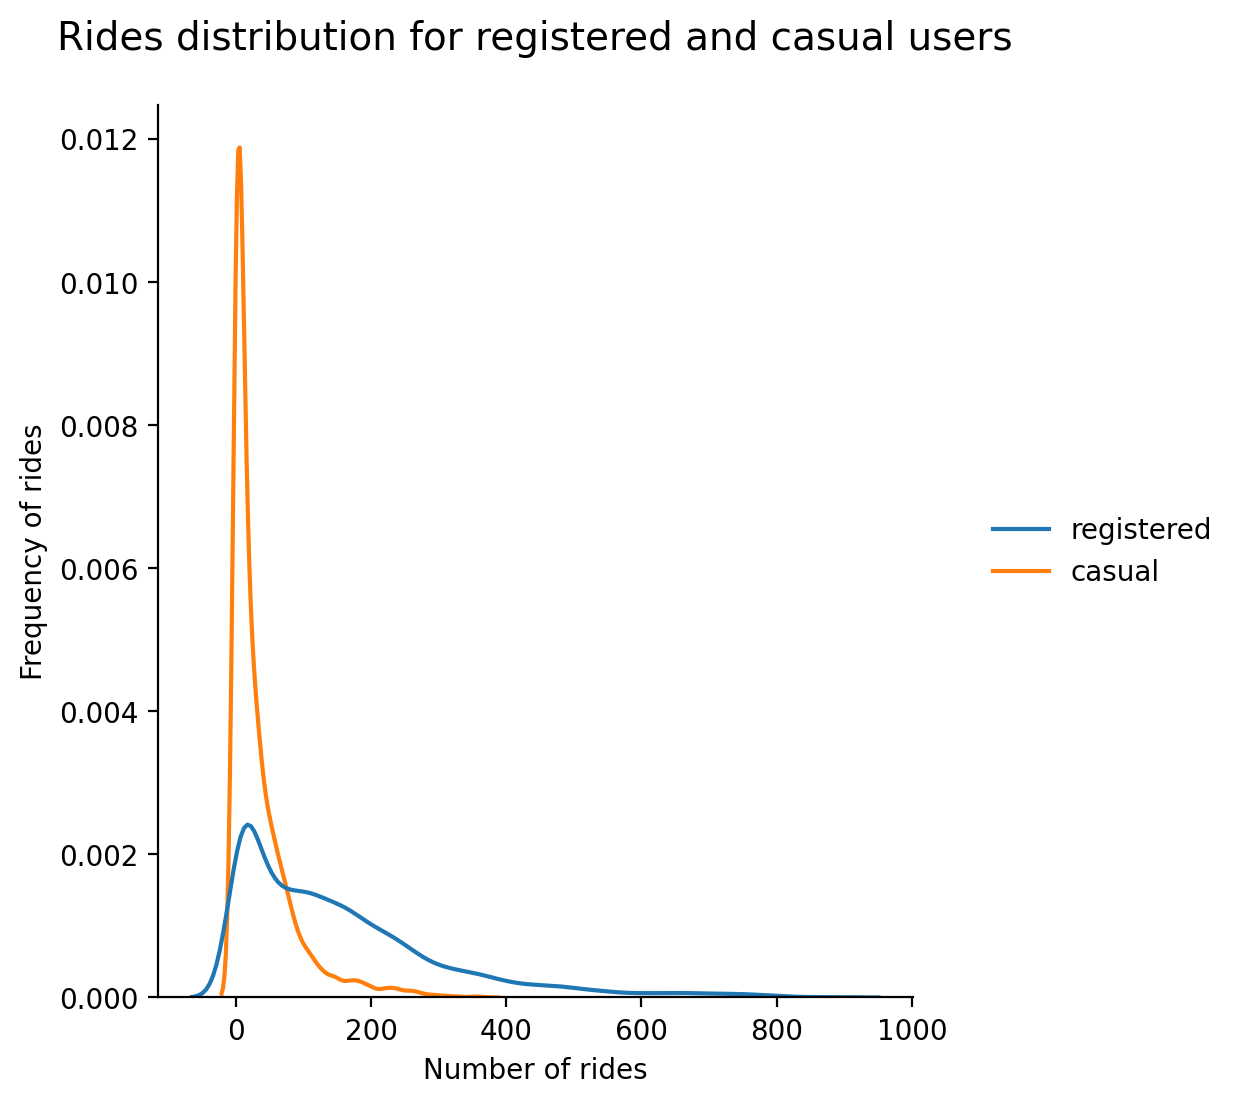

In [6]:
# Plot the distribution of both the casual and registered users to visualize the differences between them
sns.displot(the_data[['registered', 'casual']], kind="kde")
plt.xlabel('Number of rides')
plt.ylabel("Frequency of rides")
plt.title("Rides distribution for registered and casual users",  fontsize=14, pad=20)
plt.show()

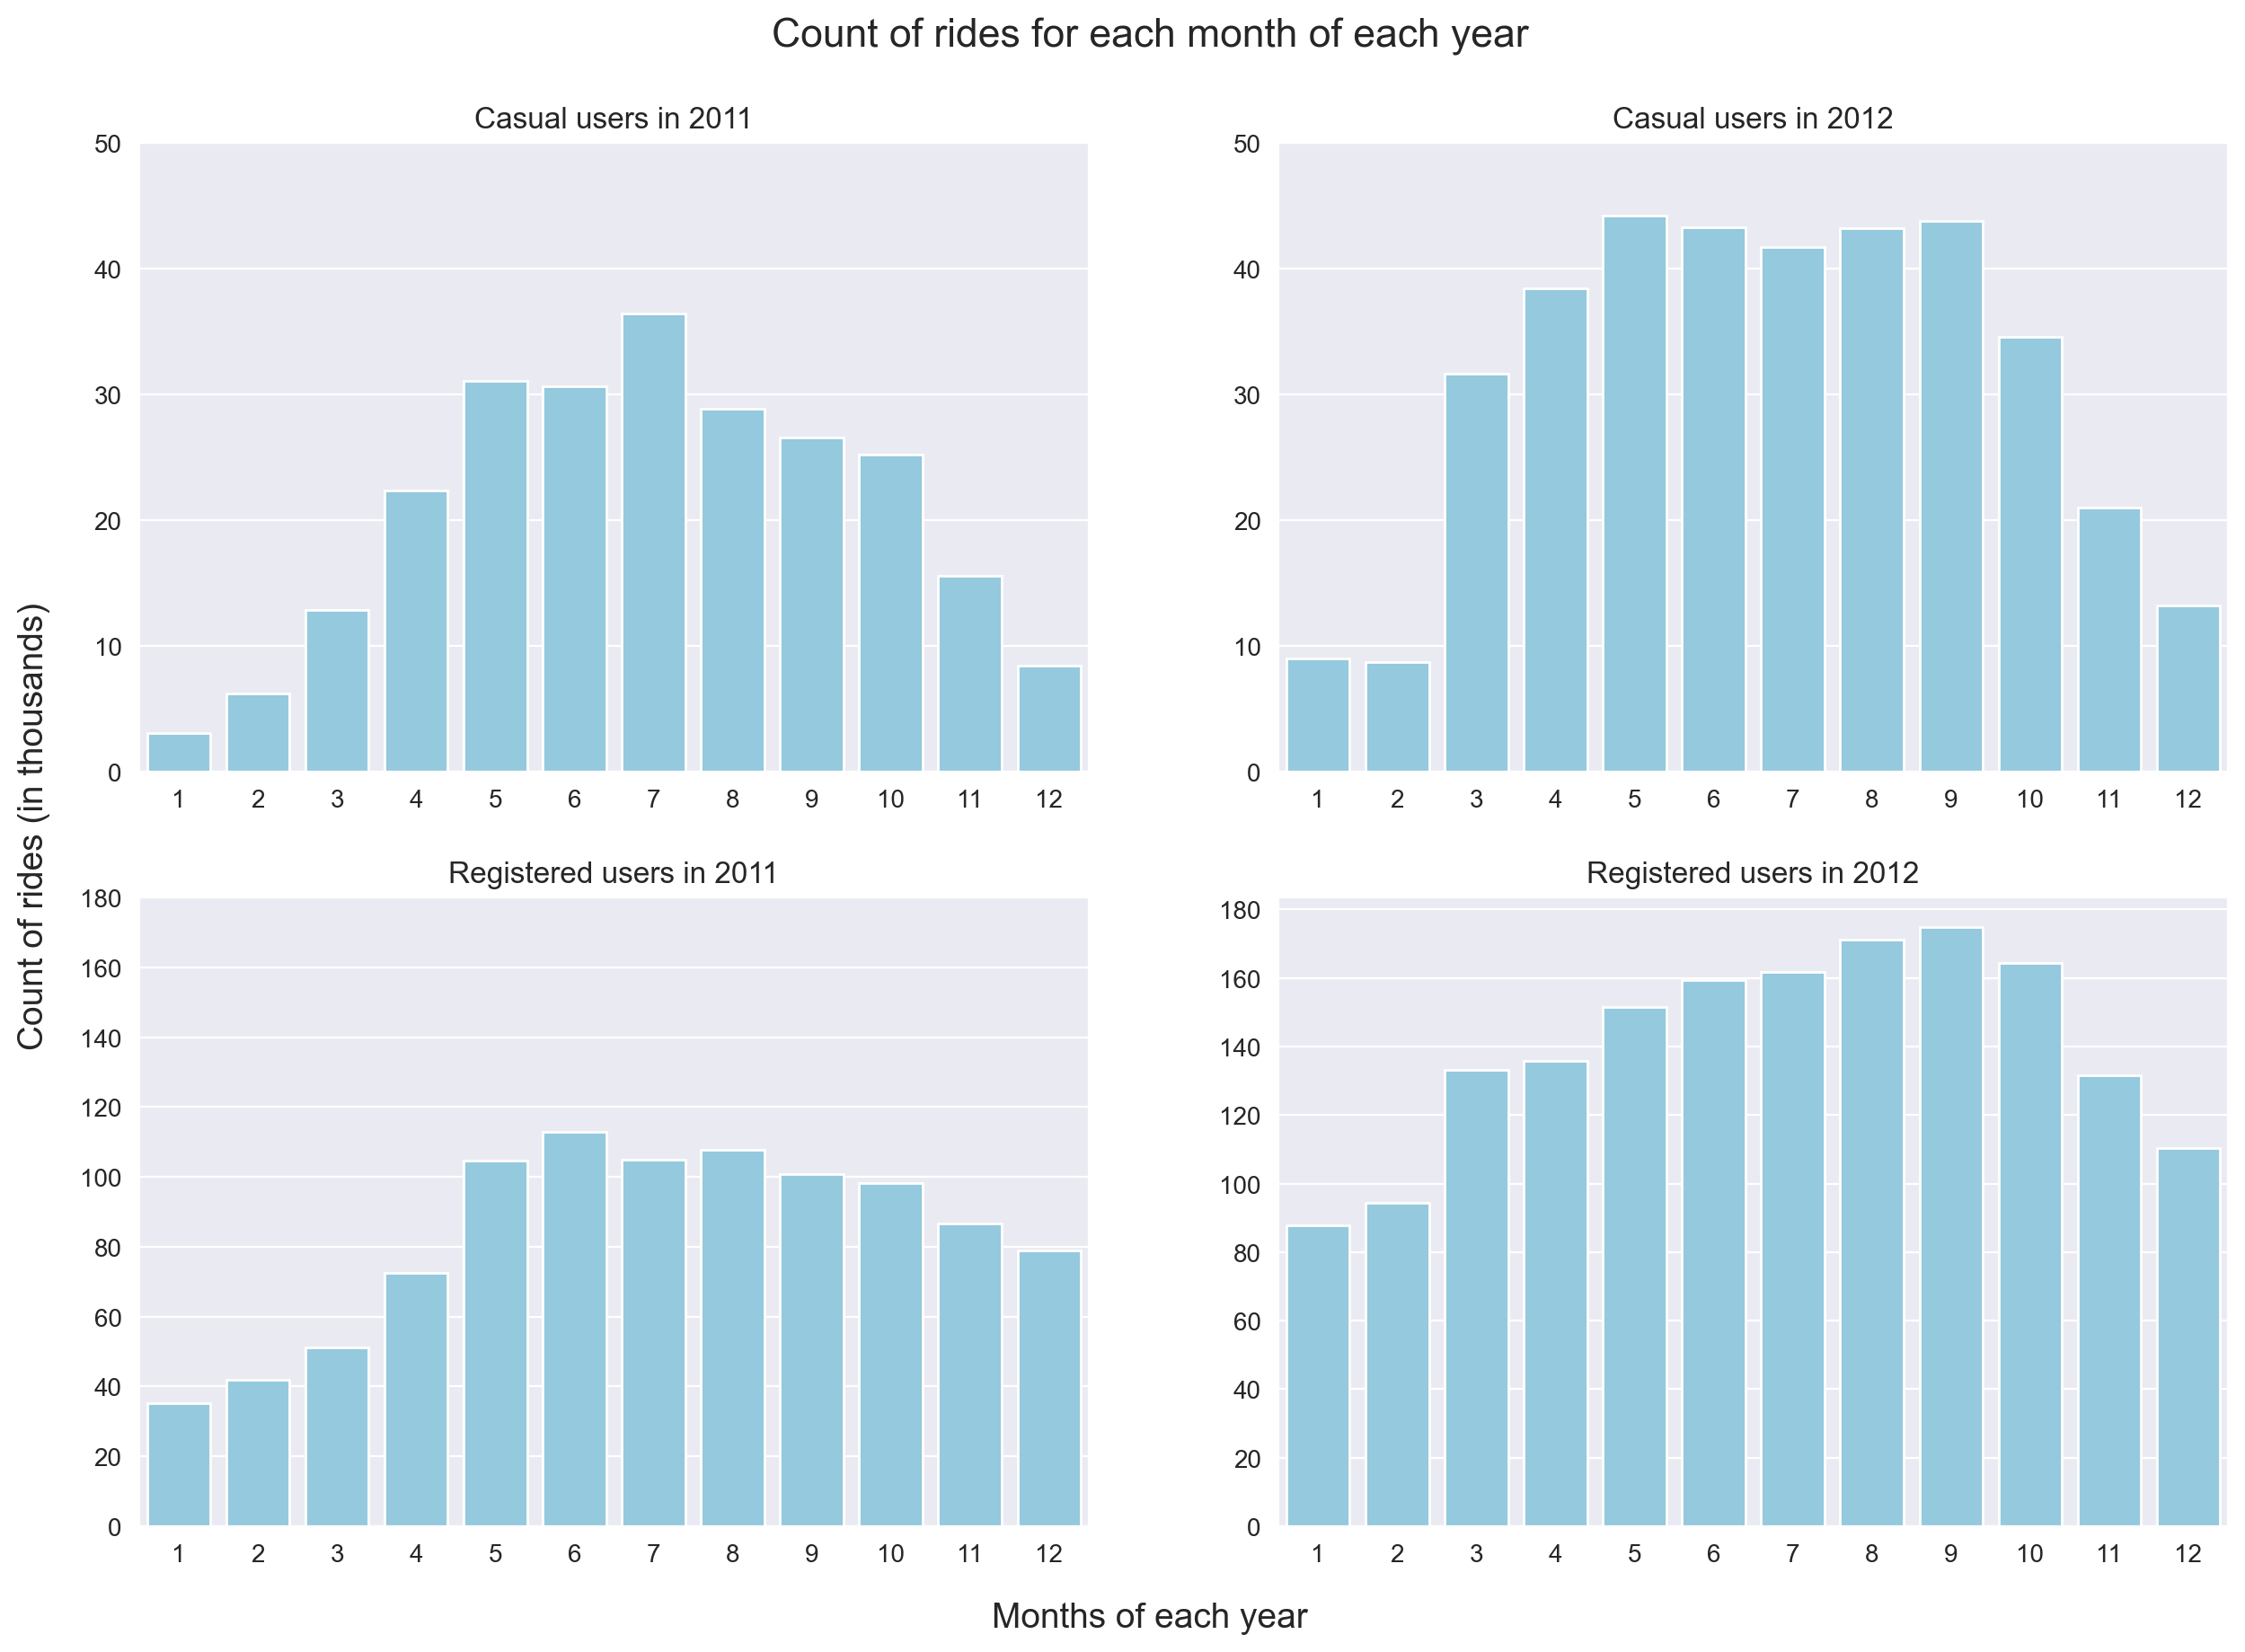

In [7]:
monthly_data = the_data[['yr', 'mnth', 'casual', 'registered']].copy()
monthly_data_grpd = monthly_data.groupby(['yr', 'mnth']).sum().reset_index()

sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2, figsize=(15,10))

monthly_data_grpd_2011 = monthly_data_grpd[monthly_data_grpd['yr'] == 2011]
monthly_data_grpd_2012 = monthly_data_grpd[monthly_data_grpd['yr'] == 2012]

def plot_barplot(y_var, data, title, yticks, yticklabels, ax):
    sns.barplot(y=y_var, x='mnth', data=data, color="skyblue", ax=ax)\
        .set(xlabel=None, ylabel=None, title=title, yticks=yticks, yticklabels=yticklabels)

plot_barplot('casual', monthly_data_grpd_2011, 'Casual users in 2011',
             range(0,60000,10000), range(0,60,10), ax[0,0])
plot_barplot('casual', monthly_data_grpd_2012, 'Casual users in 2012',
             range(0,60000,10000), range(0,60,10), ax[0,1])
plot_barplot('registered', monthly_data_grpd_2011, 'Registered users in 2011',
             range(0,200000,20000), range(0,200,20), ax[1,0])
plot_barplot('registered', monthly_data_grpd_2012, 'Registered users in 2012',
             range(0,200000,20000), range(0,200,20), ax[1,1])

fig.suptitle('Count of rides for each month of each year', fontsize=16, y=0.95)
fig.supxlabel('Months of each year', fontsize=14, y=0.05)
fig.supylabel('Count of rides (in thousands)', fontsize=14, x=0.08)
plt.show()


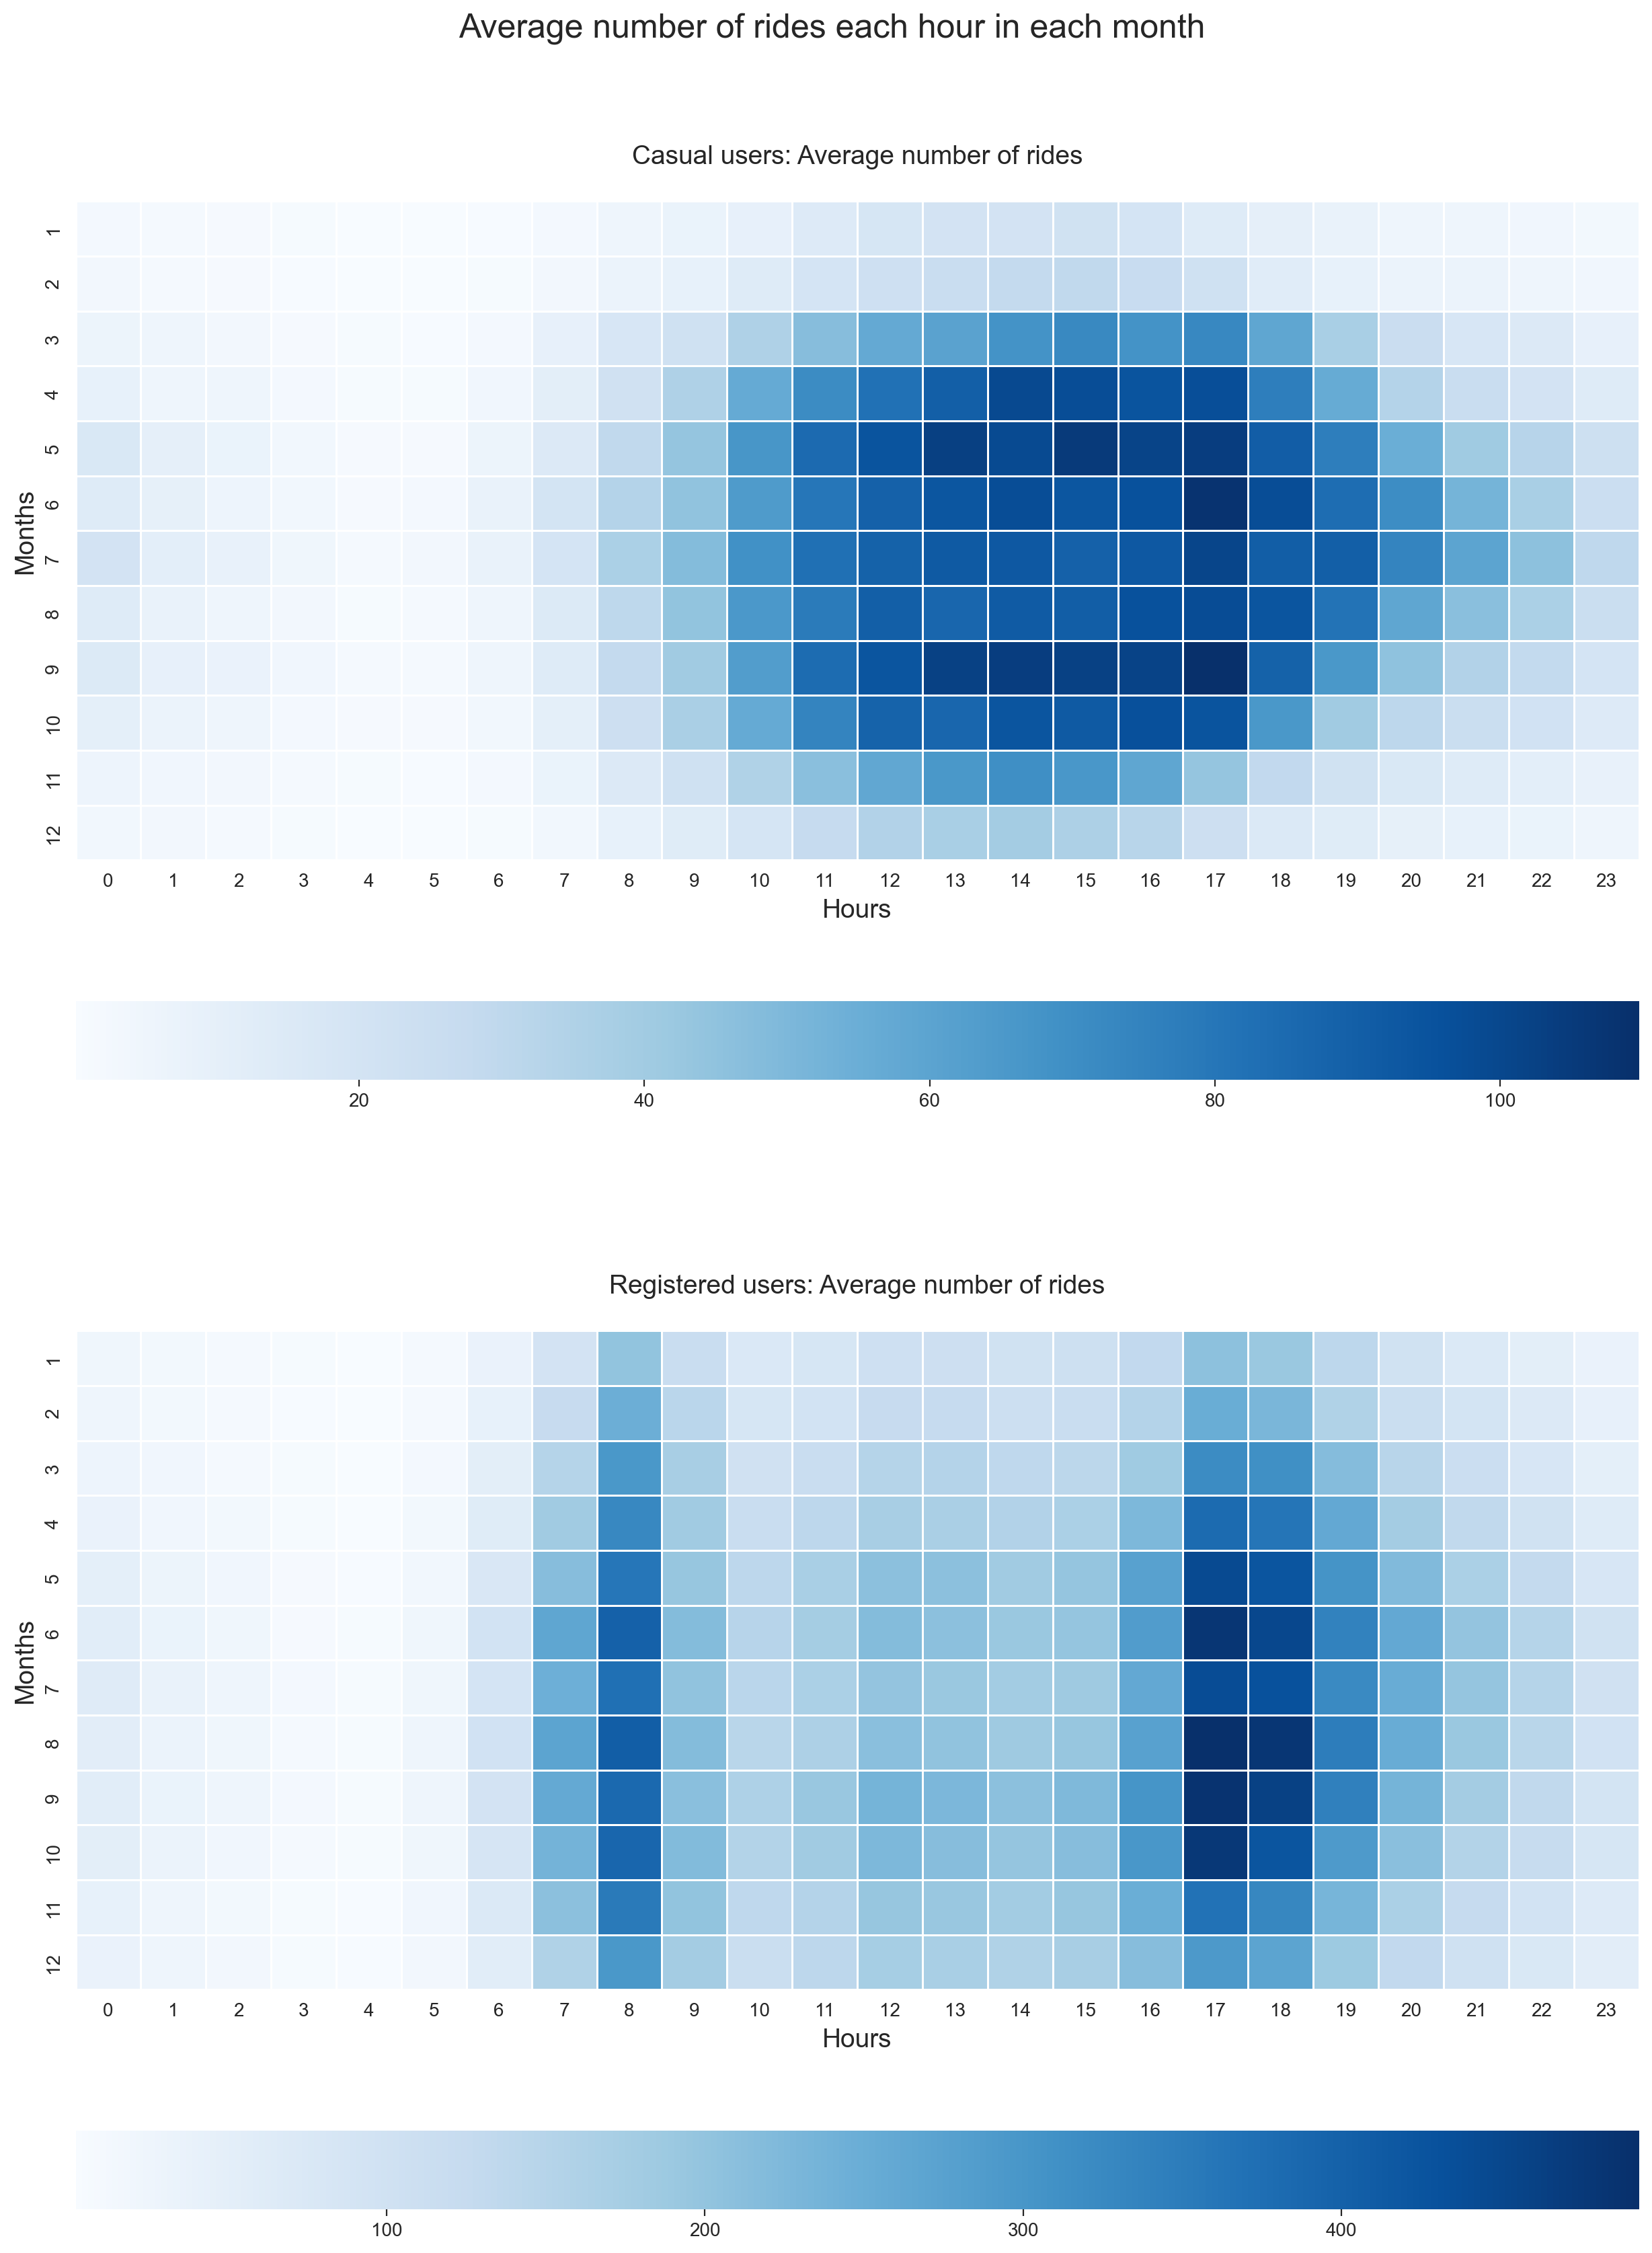

In [8]:
# Group the data by month and hour and calculate the average number of rides
cas_hours_data = the_data[['mnth', 'hr', 'casual']].groupby(['mnth', 'hr']).mean().reset_index()
reg_hours_data = the_data[['mnth', 'hr', 'registered']].groupby(['mnth', 'hr']).mean().reset_index()

# Pivot the data to make it uniform
cas_hours_uniform = cas_hours_data.pivot("mnth", "hr", "casual")
reg_hours_uniform = reg_hours_data.pivot("mnth", "hr", "registered")

# Plot the heat maps
fig, ax = plt.subplots(2, 1, figsize=(15, 20))

sns.heatmap(cas_hours_uniform, linewidths=.5, cmap="Blues", cbar_kws={"orientation": "horizontal"}, ax=ax[0])
ax[0].set_title('Casual users: Average number of rides', fontsize=14, pad=20)

sns.heatmap(reg_hours_uniform, linewidths=.5, cmap="Blues", cbar_kws={"orientation": "horizontal"}, ax=ax[1])
ax[1].set_title('Registered users: Average number of rides', fontsize=14, pad=20)

fig.suptitle('Average number of rides each hour in each month', fontsize=18, y=0.95)

for a in ax:
    a.set_xlabel('Hours', fontsize=14)
    a.set_ylabel('Months', fontsize=14)

plt.show()


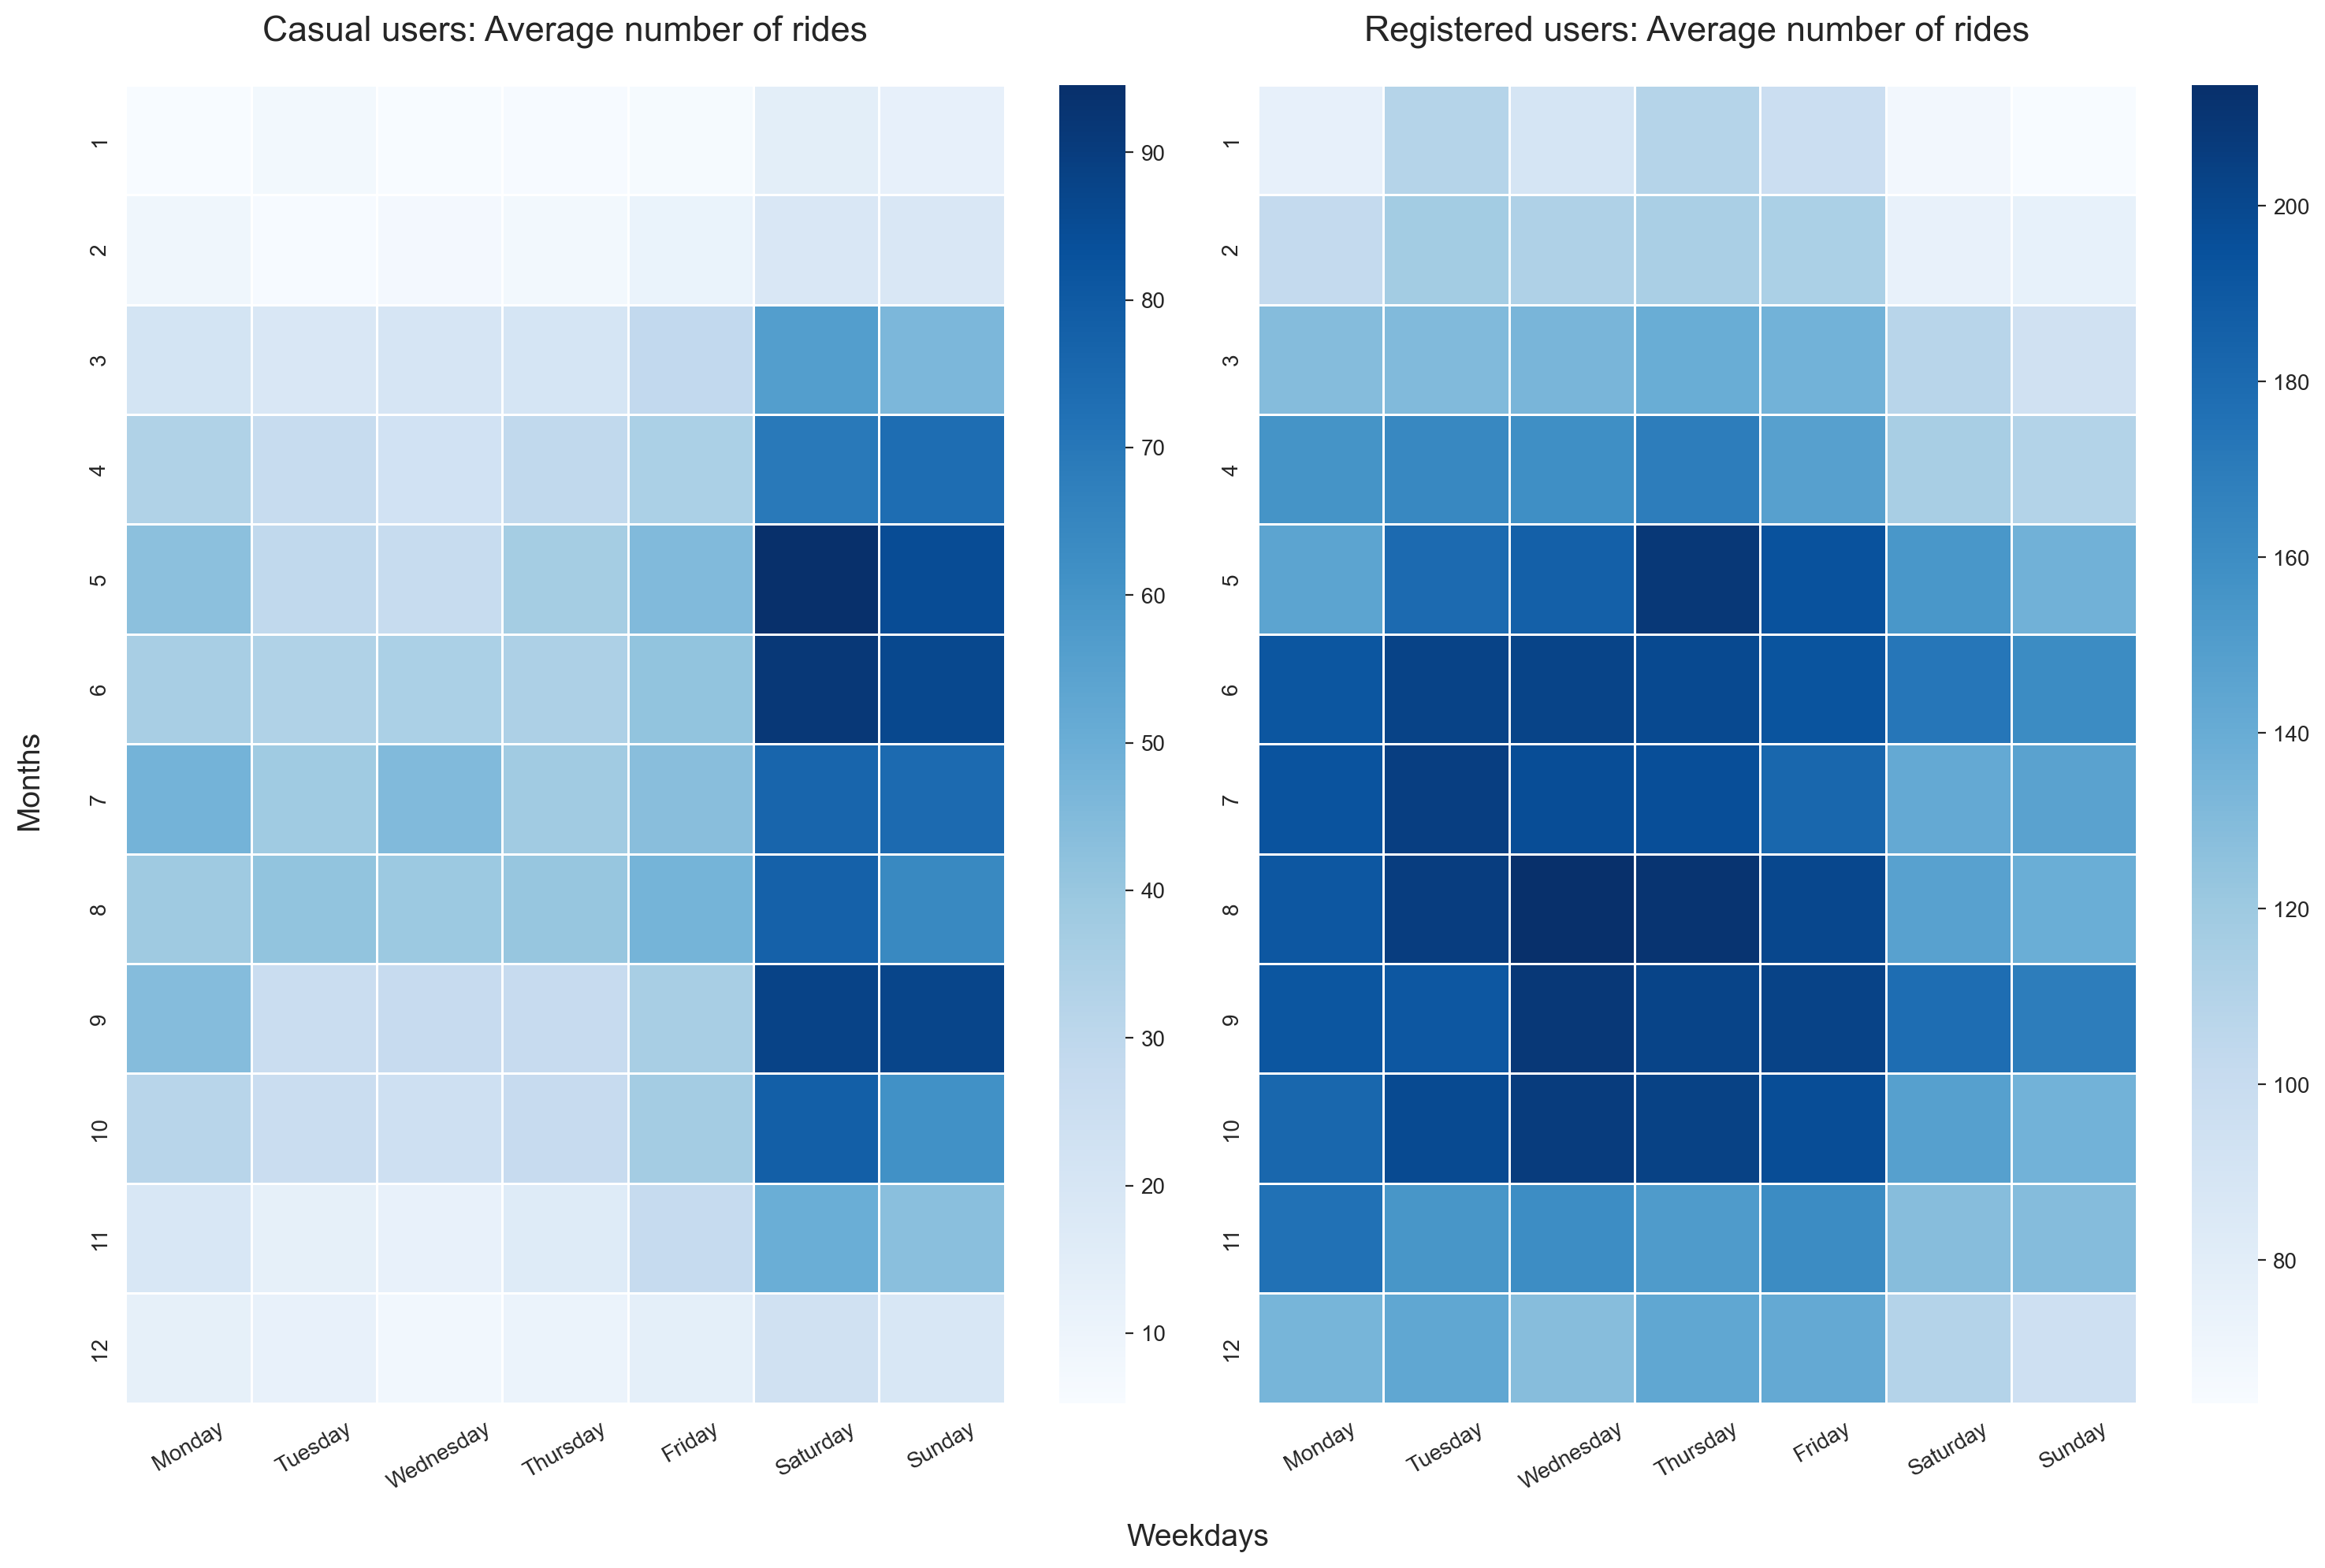

In [9]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# function to prepare data for heatmap
def prepare_data(col):
    df = the_data[['mnth', 'weekday', col]].copy()
    df_grpd = df.groupby(['mnth', 'weekday']).mean().reset_index()
    df_grpd['weekday'] = pd.Categorical(df_grpd['weekday'], weekday_order)
    df_uniform = df_grpd.pivot("mnth", "weekday", col)
    return df_uniform

cas_weekday_uniform = prepare_data('casual')
reg_weekday_uniform = prepare_data('registered')

# Plot the heat maps
fig, ax = plt.subplots(1,2, figsize=(15,10))

sns.heatmap(cas_weekday_uniform, linewidths=.5, cmap="Blues", ax=ax[0])
ax[0].set_title('Casual users: Average number of rides', fontsize=16, pad=20)

sns.heatmap(reg_weekday_uniform, linewidths=.5, cmap="Blues", ax=ax[1])
ax[1].set_title('Registered users: Average number of rides', fontsize=16, pad=20)

for ax in ax.flat:
    ax.set(xlabel=None, ylabel=None)
    ax.tick_params(axis='x', labelrotation=30)

fig.supxlabel('Weekdays', fontsize=14)
fig.supylabel('Months', fontsize=14, x=0)

fig.tight_layout()
plt.show()

**From the above created figures, we can see that the number of casual users is higher than registered users, but sometimes the both the same patterns or trends, other times they differ. Here are the observations that can be seen:**
* For both casual and registered user, the rate of rides drops significantly in winter.
* Registered users' rides are concentrated around 8 AM and 5-6 PM.
* Registered users' rides are concentrated in workdays and decrease in weekends.
* On the contrary, casual user rides are increased during weekends, and are more spread throughout the day.
* This may suggest that registered users use the bikes mainly as a way of transportation between home and work.

**Next, we will explore the effect of weather conditions and how it affects the number of rides**

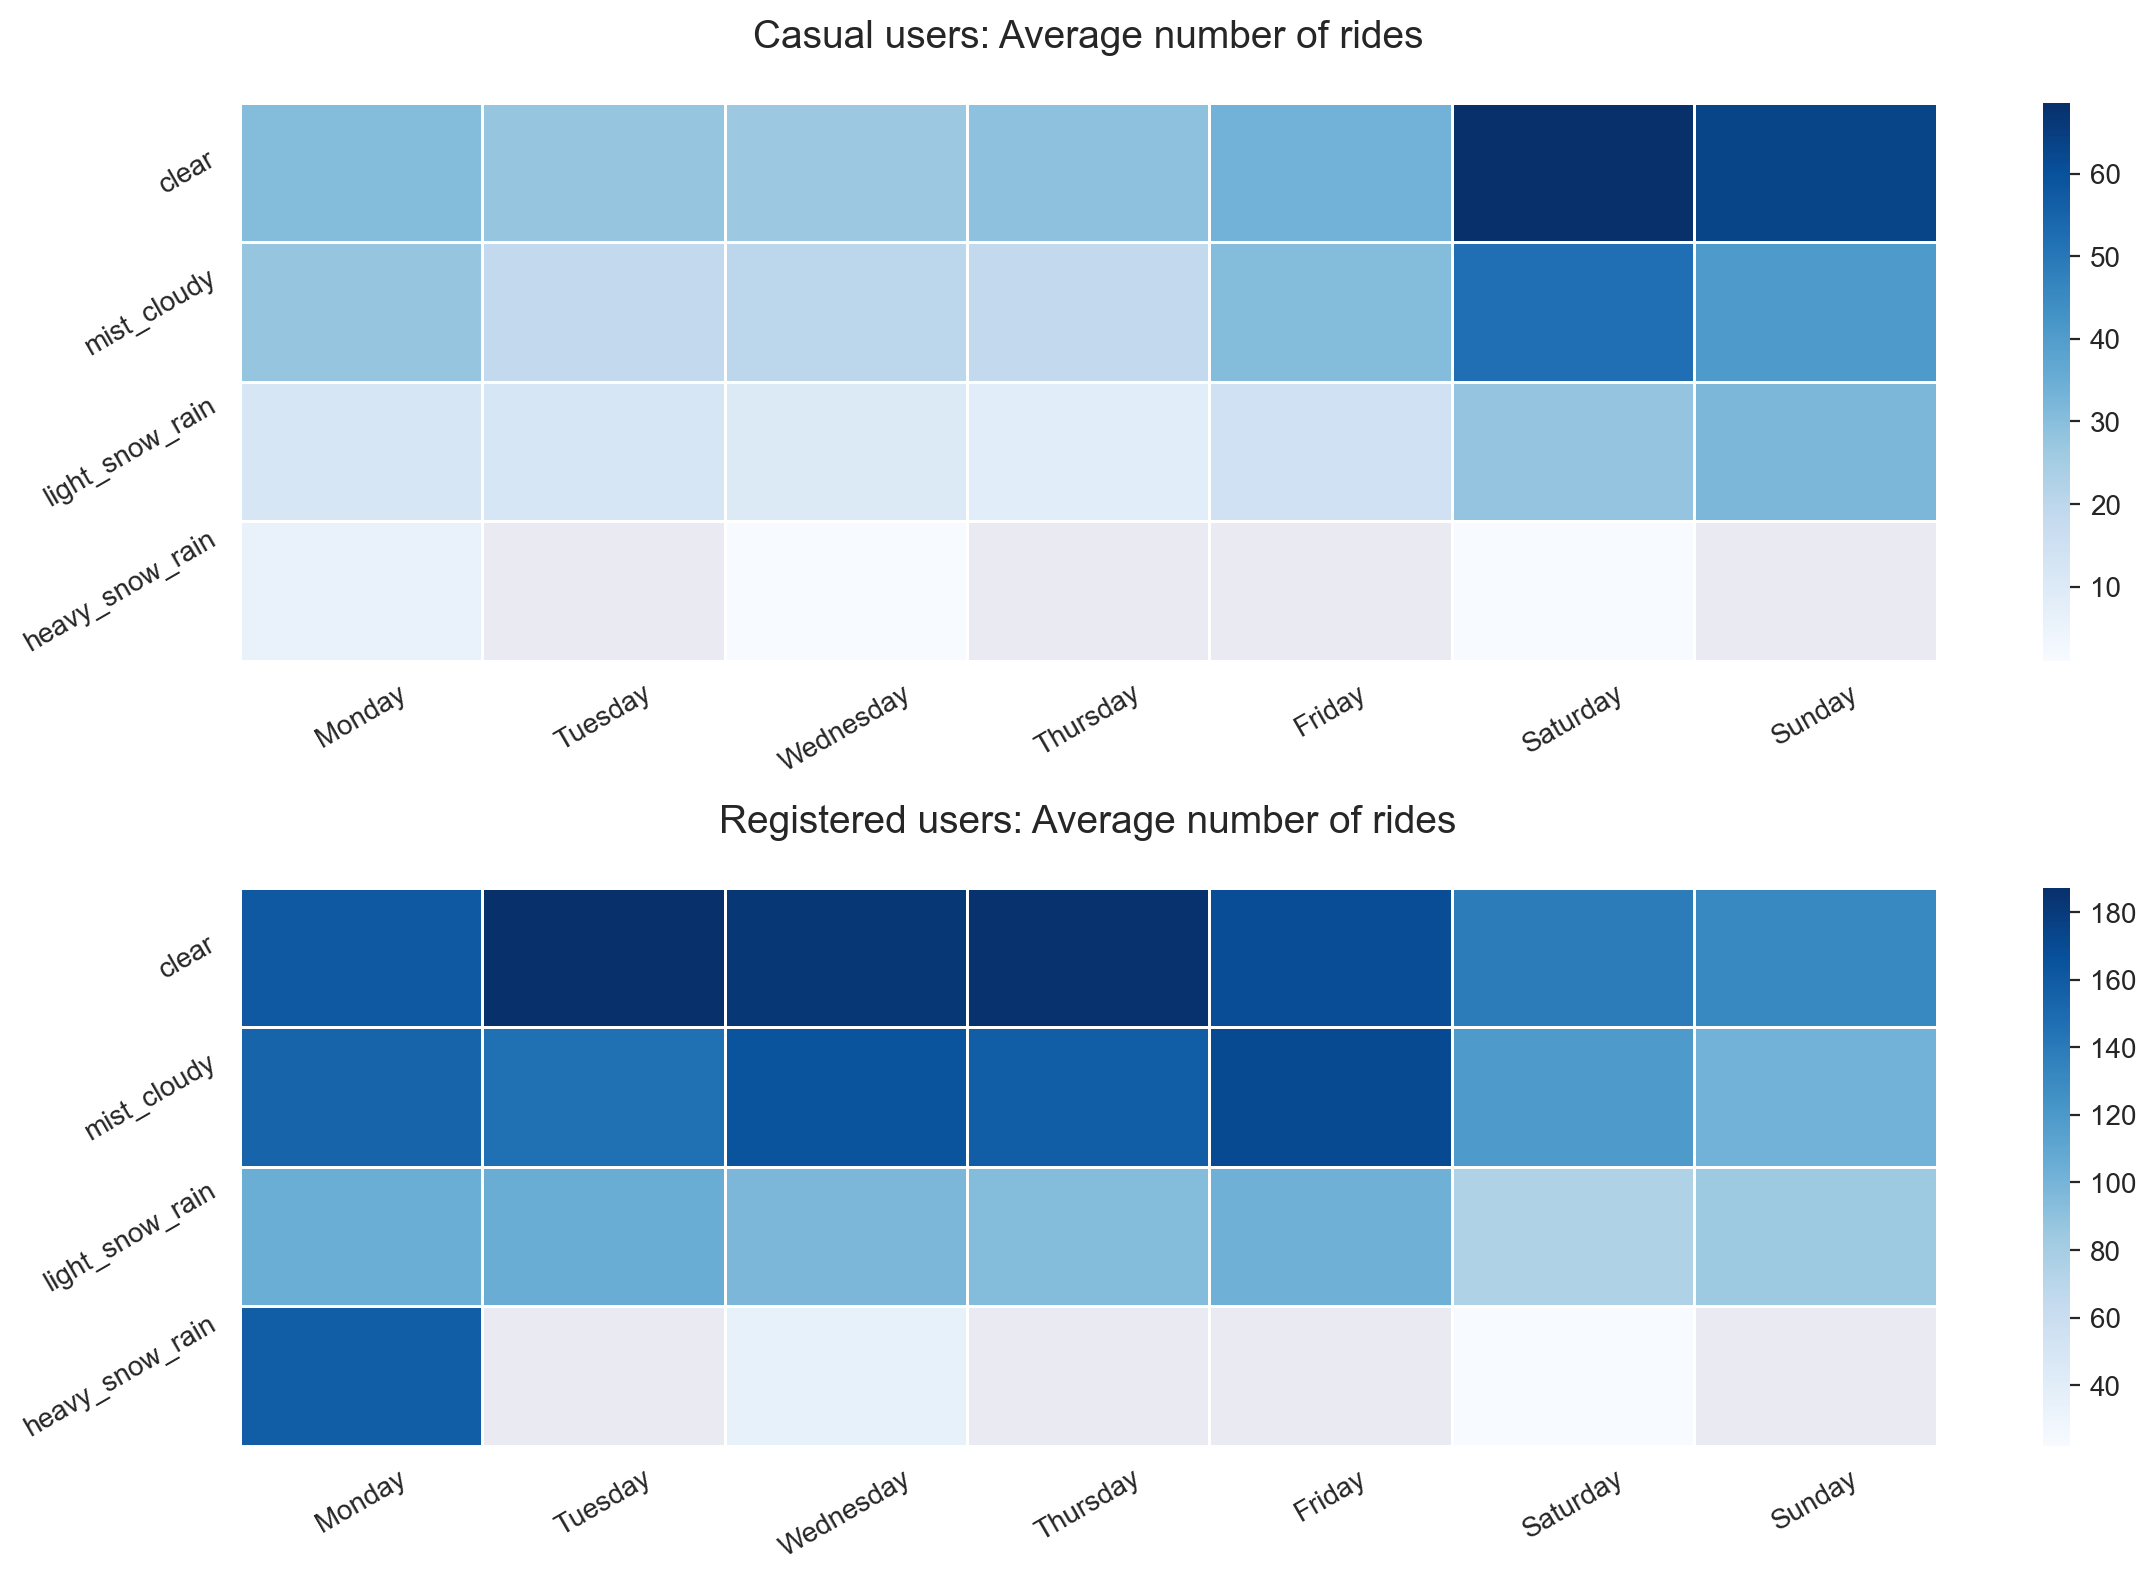

In [10]:
# Plot weathersit
weathersit_order = ['clear', 'mist_cloudy', 'light_snow_rain', 'heavy_snow_rain']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weathersit_data = the_data[['weathersit', 'weekday', 'casual', 'registered']].copy()
weathersit_data_grpd = weathersit_data.groupby(['weathersit', 'weekday']).mean().reset_index()
weathersit_data_grpd['weathersit'] = pd.Categorical(weathersit_data_grpd['weathersit'], weathersit_order)
weathersit_data_grpd['weekday'] = pd.Categorical(weathersit_data_grpd['weekday'], weekday_order)

cas_weathersit_uniform = weathersit_data_grpd.pivot("weathersit", "weekday", "casual")
reg_weathersit_uniform = weathersit_data_grpd.pivot("weathersit", "weekday", "registered")


# Plot the heat maps
fig, ax = plt.subplots(2,1, figsize=(12,8))

sns.heatmap(cas_weathersit_uniform, linewidths=.5, cmap="Blues", ax=ax[0])
ax[0].set(xlabel=None, ylabel=None)
ax[0].set_title('Casual users: Average number of rides', fontsize=14, pad=20)

sns.heatmap(reg_weathersit_uniform, linewidths=.5, cmap="Blues", ax=ax[1])
ax[1].set(xlabel=None, ylabel=None)
ax[1].set_title('Registered users: Average number of rides', fontsize=14, pad=20)

for ax in ax.flat:
    ax.tick_params(axis='x', labelrotation=30)
    ax.tick_params(axis='y', labelrotation=30)

fig.tight_layout()
plt.show()

In [11]:
# Find the correlation between  number of rides and weather conditions:

casual_corr_temp = round(the_data['casual'].corr(the_data['temp']), 3)
casual_corr_atemp = round(the_data['casual'].corr(the_data['atemp']), 3)
casual_corr_hum = round(the_data['casual'].corr(the_data['hum']), 3)
casual_corr_windspeed = round(the_data['casual'].corr(the_data['windspeed']), 3)

registered_corr_temp = round(the_data['registered'].corr(the_data['temp']), 3)
registered_corr_atemp = round(the_data['registered'].corr(the_data['atemp']), 3)
registered_corr_hum = round(the_data['registered'].corr(the_data['hum']), 3)
registered_corr_windspeed = round(the_data['registered'].corr(the_data['windspeed']), 3)

print(f"""
For casual users:
- Correlation between rides and 'temperature' is {casual_corr_temp}.
- Correlation between rides and 'feeling temperature' is {casual_corr_atemp}.
- Correlation between rides and 'humidity' is {casual_corr_hum}.
- Correlation between rides and 'windspeed' is {casual_corr_windspeed}.

For registered users:
- Correlation between rides and 'temperature' is {registered_corr_temp}.
- Correlation between rides and 'feeling temperature' is {registered_corr_atemp}.
- Correlation between rides and 'humidity' is {registered_corr_hum}.
- Correlation between rides and 'windspeed' is {registered_corr_windspeed}.
""")


For casual users:
- Correlation between rides and 'temperature' is 0.46.
- Correlation between rides and 'feeling temperature' is 0.454.
- Correlation between rides and 'humidity' is -0.347.
- Correlation between rides and 'windspeed' is 0.09.

For registered users:
- Correlation between rides and 'temperature' is 0.335.
- Correlation between rides and 'feeling temperature' is 0.333.
- Correlation between rides and 'humidity' is -0.274.
- Correlation between rides and 'windspeed' is 0.082.



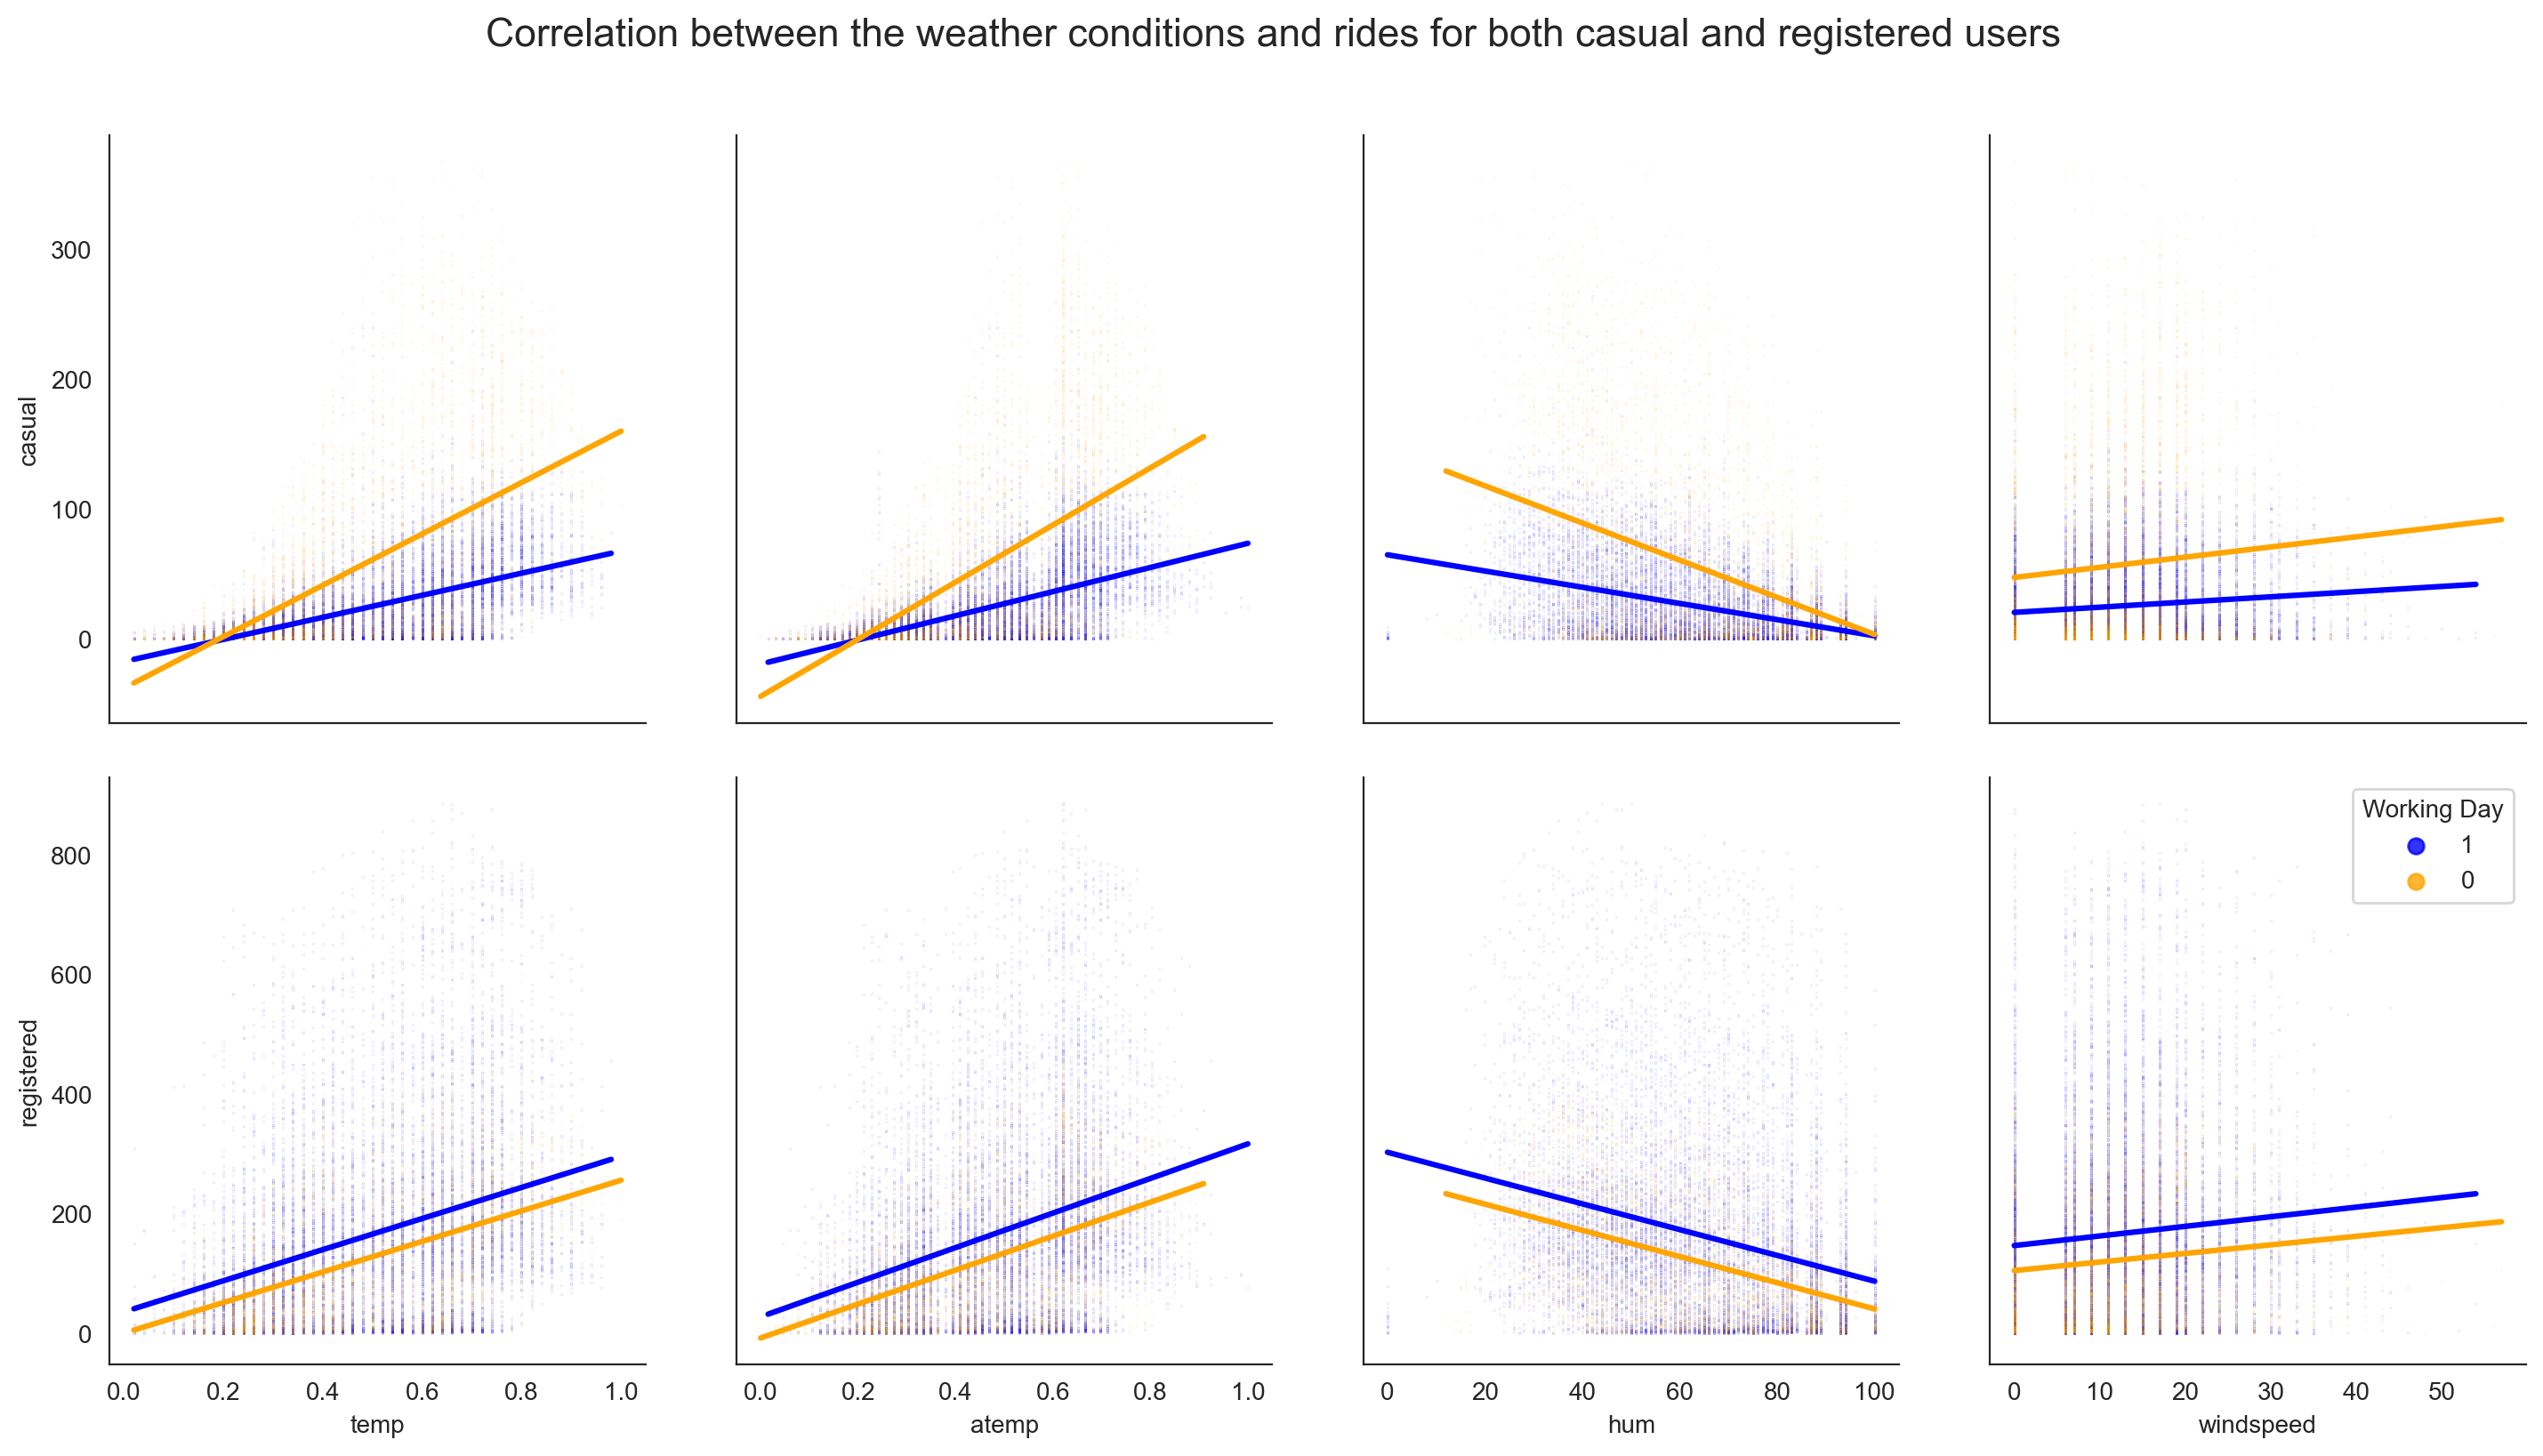

In [12]:
# Plot the correlations between  number of rides and weather conditions

sns.set_style('white')

x_vars = ['temp', 'atemp', 'hum', 'windspeed']
y_vars = ["casual", "registered"]

fig = sns.PairGrid(the_data, x_vars=x_vars, y_vars=y_vars,
                   hue='workingday', hue_order=[1, 0], palette=['blue', 'orange'])
fig.map(sns.regplot,  ci=None, scatter_kws={'s':0.001})

fig.figure.set_size_inches(15,8)
fig.figure.suptitle('Correlation between the weather conditions and rides for both casual and registered users',fontsize=16, y=1.05)
plt.legend(title='Working Day', markerscale=200)

plt.show()

**From the correlation results and the graphs shown above, we can see that:**
* Correlation between number of rides and the temperature is stronger than between number of rides and humidity. As for  the correlation between number of rides and wind speed, it is very weak correlation.
* We can see that the correlation between number of rides and the weather conditions is stronger for casual users than registered user, both in positive and negative correlations.
* The difference in correlation during working days and non-working days is more diverse in case of casual users than in registered users.

# Hope you enjoyed my code.
## __To view the presentation given to the client regarding this case study, [Click Here](https://github.com/Fawzy-Almatary/Portfolio-Projects/blob/main/Bikesharing-Analysis_(First-Python-Project)/Bikesharing_Analysis_Presentation.pdf).__